In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import pyfolio as pf
from extract_returns import extract_returns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
results = pd.read_pickle('results/maximize_return_2007-2012.pickle')
results.tail()

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2012-12-24 18:00:00+00:00,0.208530,2.178761,0.227735,0.141374,0.248112,-0.234374,29495.50,3178760.72,-85228181.12,0.0,...,-1.607016e+08,0.0,4,1.498399,3149265.22,-86587344.24,0.0,1506,"[{'commission': None, 'price': 76200.0, 'sid':...",0.0
2012-12-26 21:00:00+00:00,0.208479,2.202854,0.228690,0.136563,0.248036,-0.234443,24093.00,3202853.72,-85204088.12,0.0,...,-1.606795e+08,0.0,4,1.506724,3178760.72,-85228181.12,0.0,1507,[],0.0
2012-12-27 21:00:00+00:00,0.208479,2.247691,0.230828,0.135039,0.247955,-0.234496,44837.43,3247691.15,-85163650.69,0.0,...,-1.606549e+08,0.0,4,1.522512,3202853.72,-85204088.12,0.0,1508,"[{'commission': None, 'price': 3.392, 'sid': F...",0.0
2012-12-28 21:00:00+00:00,0.208432,2.226490,0.229146,0.122772,0.247913,-0.234198,-21201.00,3226490.15,-87000601.69,0.0,...,-1.606641e+08,0.0,4,1.514154,3247691.15,-85163650.69,0.0,1509,"[{'commission': None, 'price': 1.614, 'sid': F...",0.0
2012-12-31 21:00:00+00:00,0.208470,2.282038,0.232483,0.141855,0.247926,-0.233273,55547.50,3282037.65,-87557054.19,0.0,...,-1.606376e+08,0.0,4,1.533667,3226490.15,-87000601.69,0.0,1510,"[{'commission': None, 'price': 1020.0, 'sid': ...",0.0


In [3]:
returns, positions, transactions = extract_returns(results)

In [4]:
def save_to_files(results, positions, transactions):
    results.to_csv('results.csv')
    returns.to_csv('returns.csv')
    transactions.to_csv('transactions.csv')
    positions.to_csv('positions.csv')
#save_to_files(results, positions, transactions)

In [5]:
# generate sector dictionary for every symbol
#pos = list(positions.columns)
#pos.remove('cash')
pos = list(transactions['symbol'])
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector', 'sub_sector'], index_col=['root_symbol'])
sectors['sector'] = sectors['sector'].str.cat(sectors['sub_sector'], sep='/')
del sectors['sub_sector']
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map = {p: sectors[p.root_symbol] for p in pos}

In [6]:
out_of_sample=results.index[-21]
transactions_mod = transactions.copy()
transactions_mod.price = transactions.sid.apply(lambda x: x.multiplier) * transactions.price
benchmark = (results['benchmark_period_return'] + 1).pct_change()[1:]
benchmark.index = benchmark.index.normalize()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,21.62,2011-08-09,2012-10-24,NaT,NaN
1,20.49,2007-02-22,2007-08-07,2007-11-02,182
2,17.79,2009-12-01,2010-05-10,2010-08-16,185
3,14.59,2010-11-04,2011-03-29,2011-04-29,127
4,11.98,2008-03-17,2008-04-03,2008-09-09,127


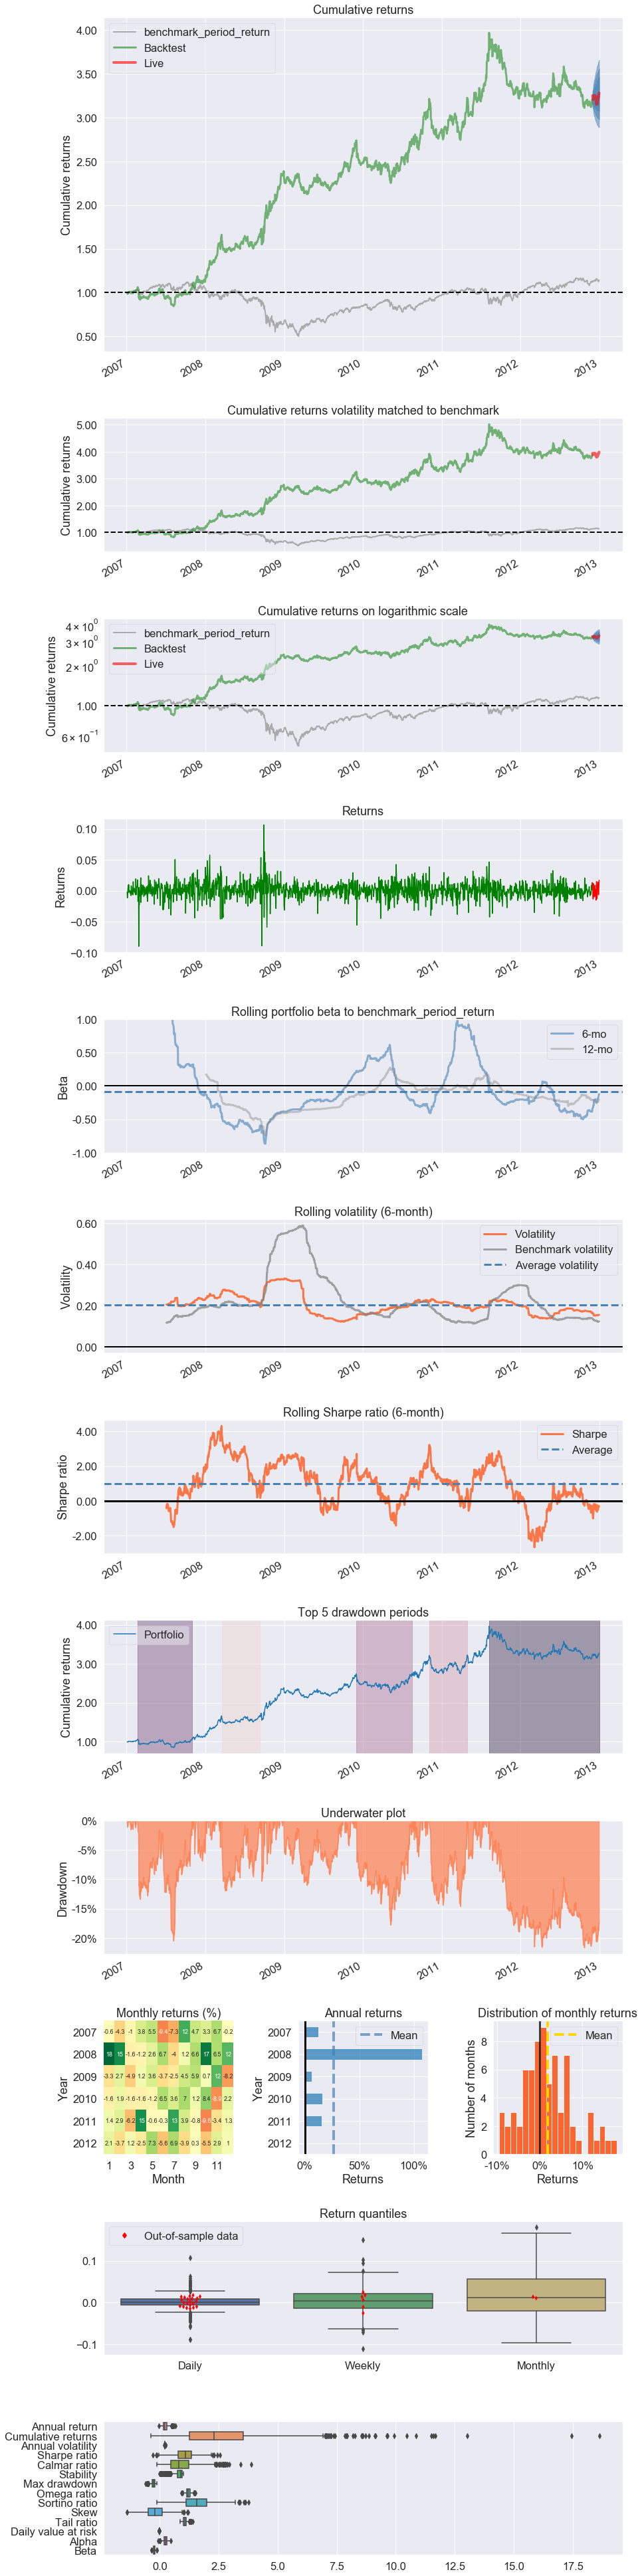

Stress Events,mean,min,max
Lehmann,0.23%,-8.90%,10.65%
US downgrade/European Debt Crisis,0.18%,-4.24%,4.65%
Fukushima,0.20%,-2.15%,1.40%
EZB IR Event,-0.21%,-1.37%,1.58%
Aug07,0.52%,-1.83%,5.07%
Mar08,-0.15%,-4.56%,3.95%
Sept08,0.38%,-8.90%,10.65%
2009Q1,-0.01%,-3.12%,2.28%
2009Q2,-0.00%,-2.32%,1.90%
Flash Crash,-0.79%,-1.74%,0.32%


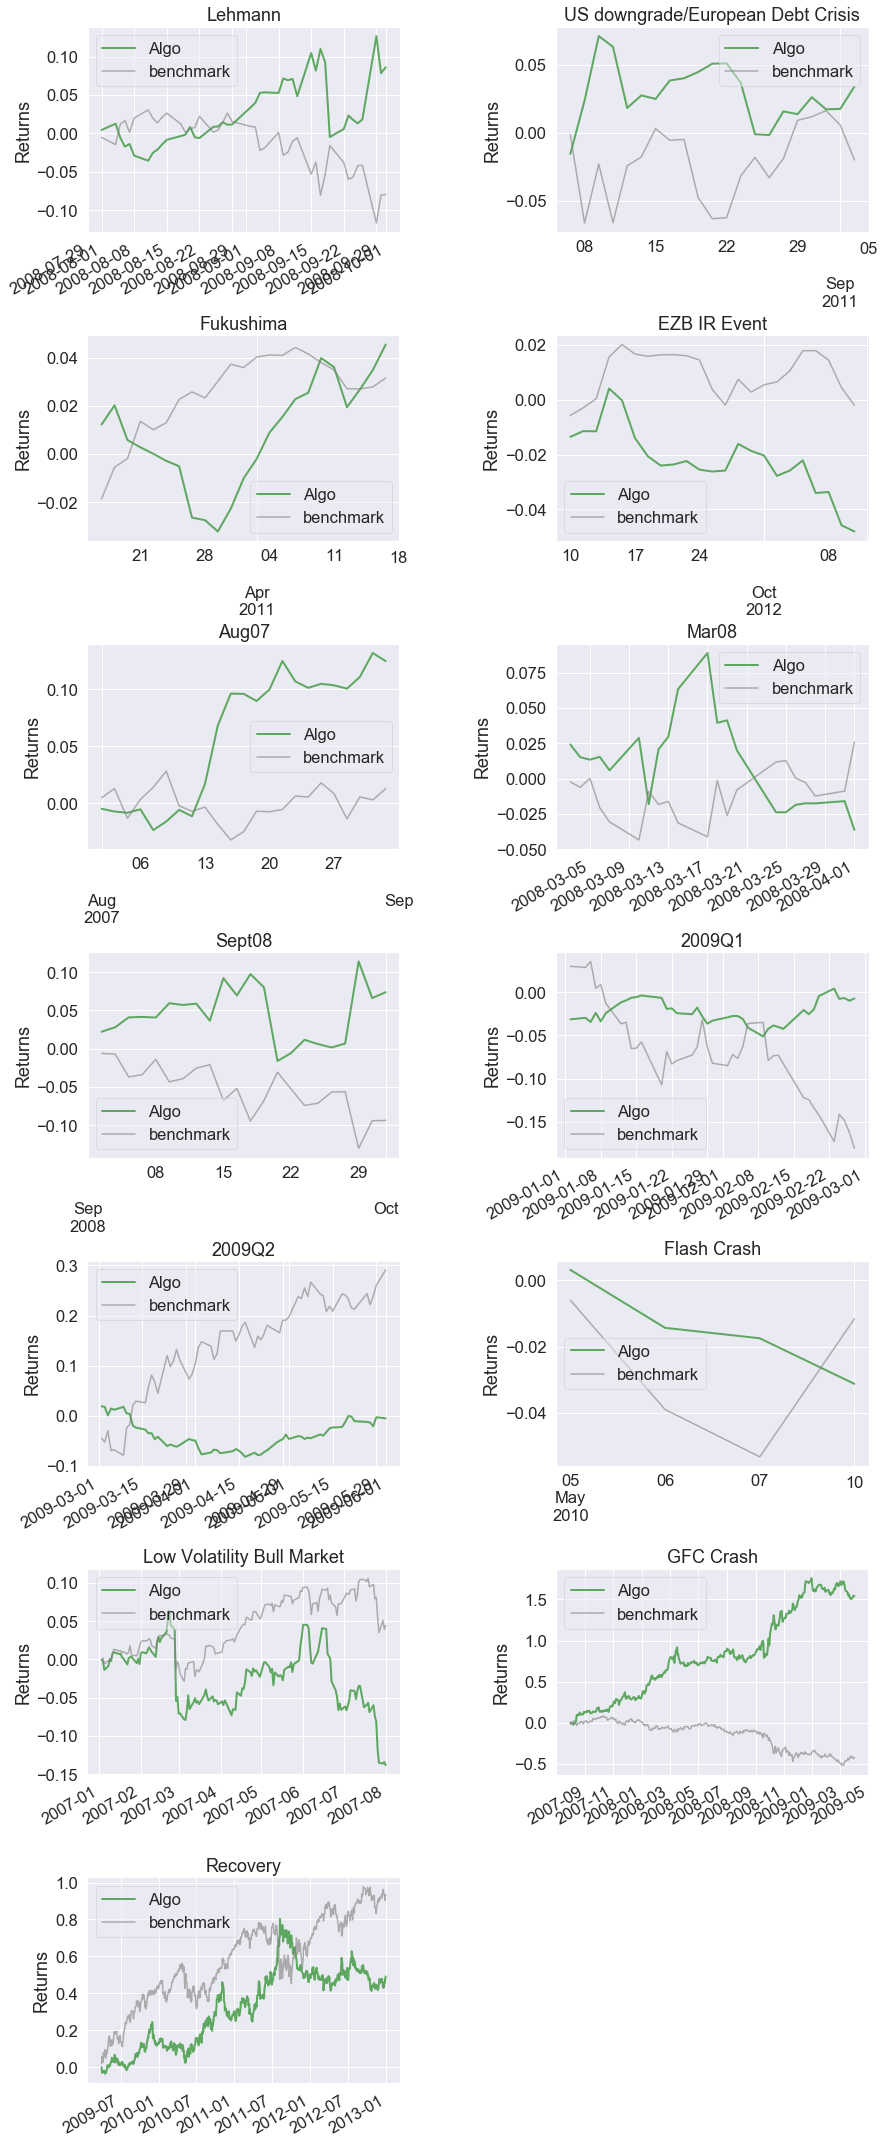

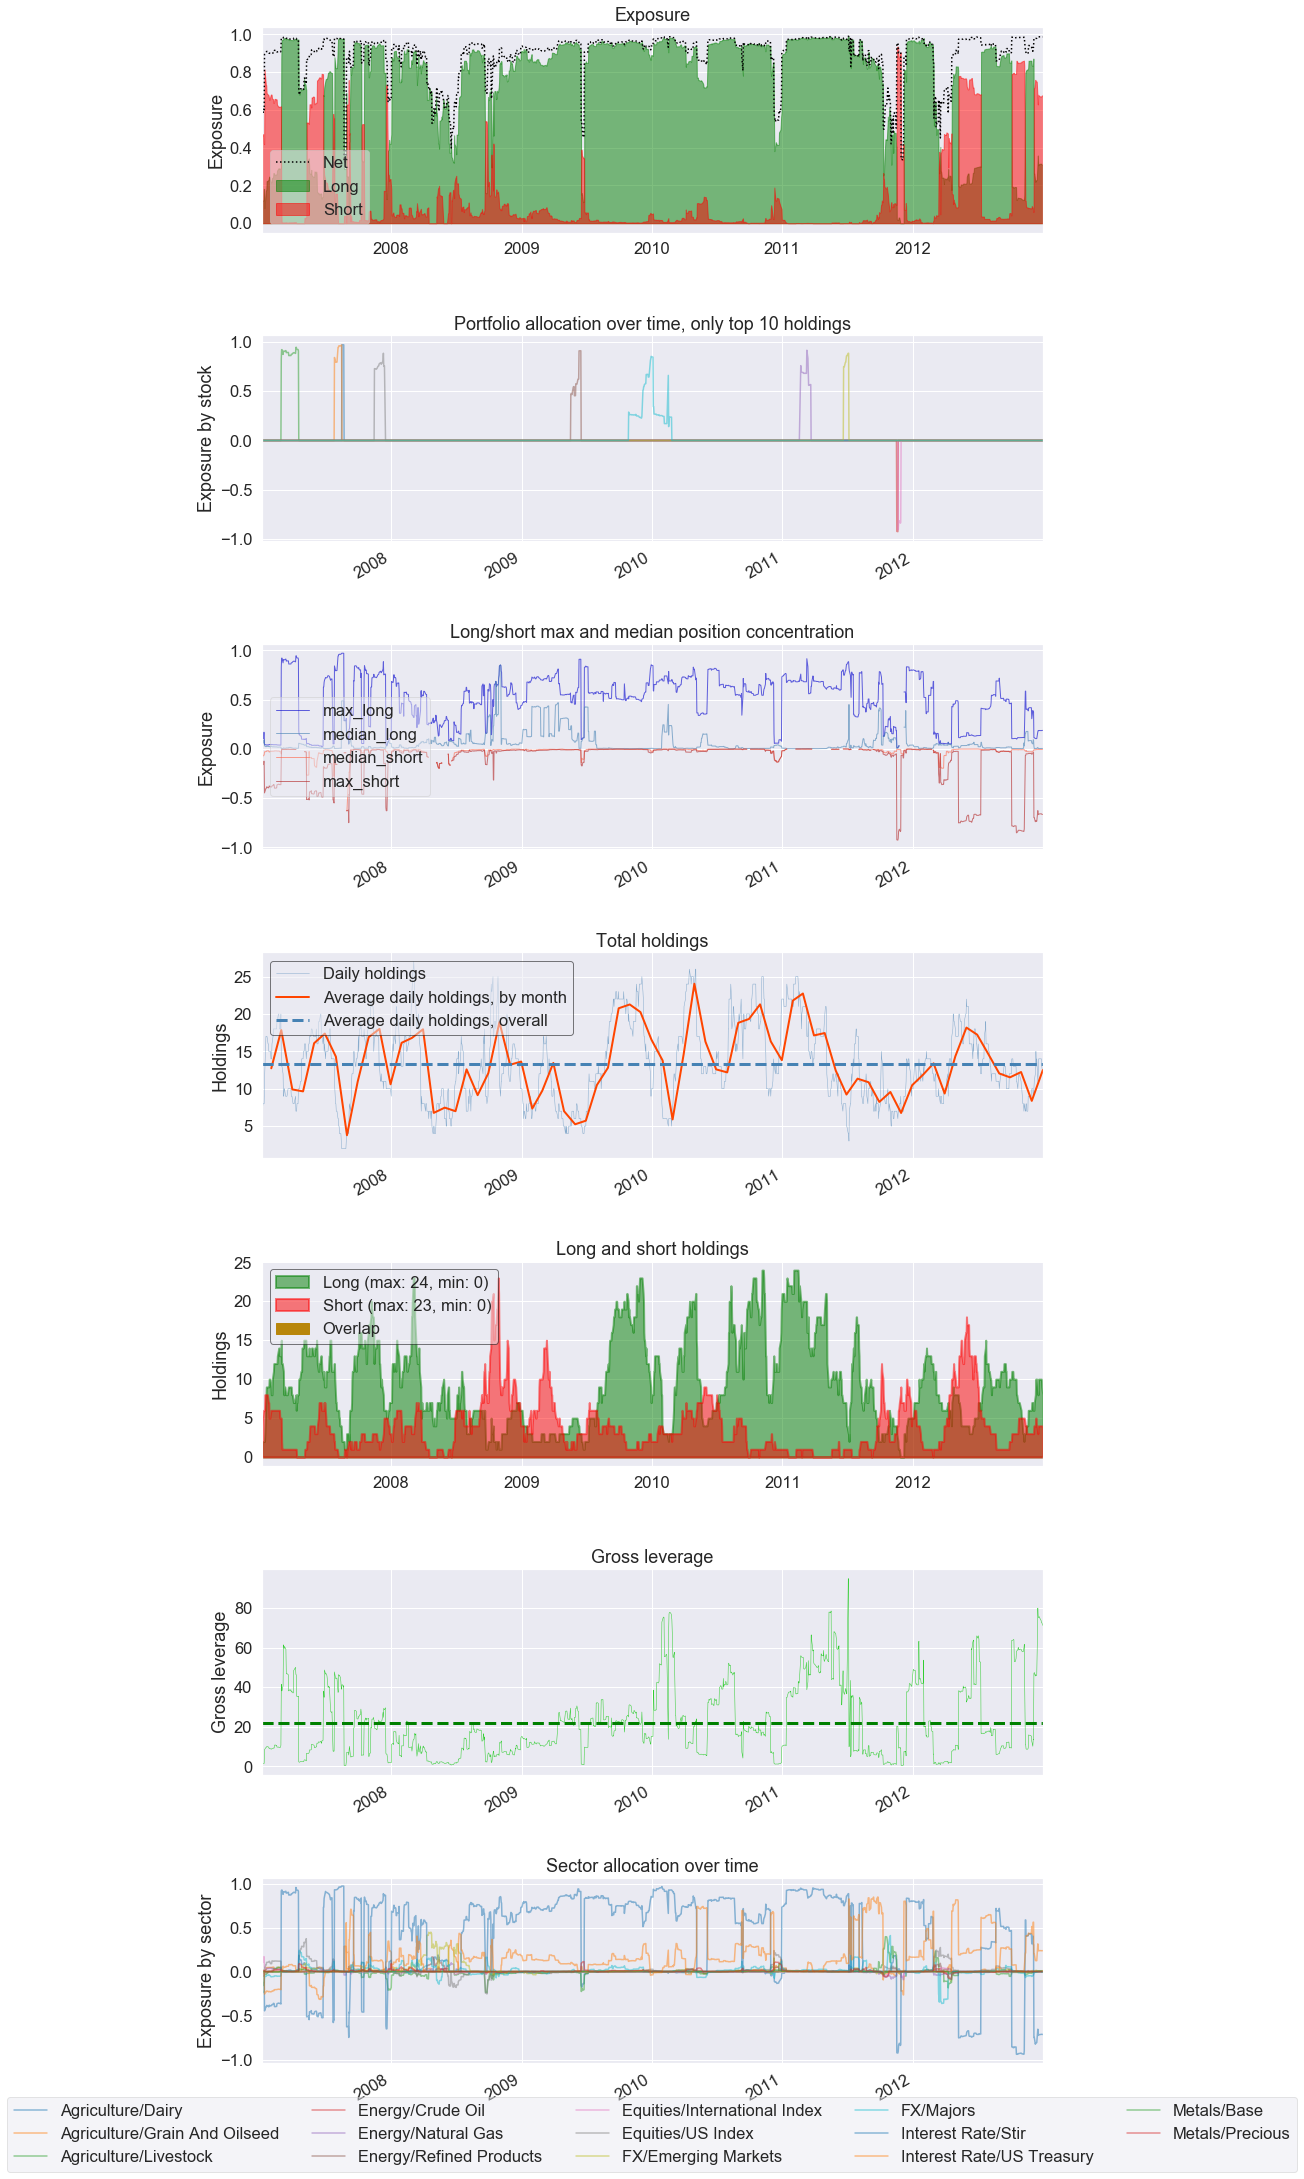

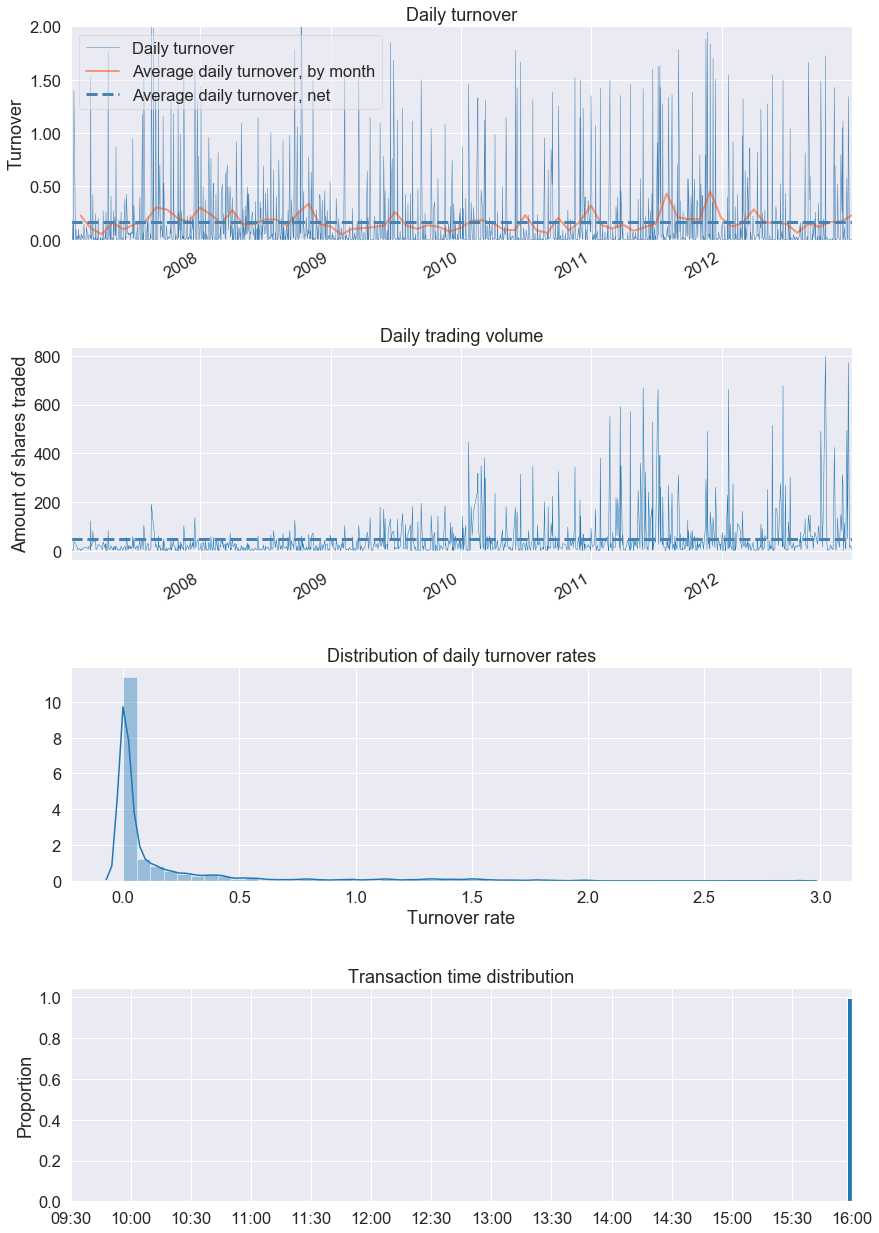

Summary stats,All trades,Short trades,Long trades
Total number of round_trips,1690.00,503.00,1187.00
Percent profitable,0.55,0.50,0.58
Winning round_trips,936.00,249.00,687.00
Losing round_trips,733.00,249.00,484.00
Even round_trips,21.00,5.00,16.00


PnL stats,All trades,Short trades,Long trades
Total profit,$2282037.65,$173297.38,$2108740.27
Gross profit,$9106581.72,$2204426.39,$6902155.33
Gross loss,$-6824544.07,$-2031129.01,$-4793415.06
Profit factor,$1.33,$1.09,$1.44
Avg. trade net profit,$1350.32,$344.53,$1776.53
Avg. winning trade,$9729.25,$8853.12,$10046.81
Avg. losing trade,$-9310.43,$-8157.14,$-9903.75
Ratio Avg. Win:Avg. Loss,$1.04,$1.09,$1.01
Largest winning trade,$125000.00,$76000.00,$125000.00
Largest losing trade,$-93600.00,$-74775.00,$-93600.00


Duration stats,All trades,Short trades,Long trades
Avg duration,25 days 17:06:29.829585,23 days 11:52:43.427435,26 days 15:39:52.930075
Median duration,21 days 00:00:00,20 days 01:00:00,21 days 00:00:00
Longest duration,104 days 01:00:00,99 days 00:00:00,104 days 01:00:00
Shortest duration,0 days 00:00:00,0 days 00:00:00,0 days 00:00:00


Return stats,All trades,Short trades,Long trades
Avg returns all round_trips,0.02%,0.02%,0.01%
Avg returns winning,0.09%,0.12%,0.08%
Avg returns losing,-0.07%,-0.06%,-0.08%
Median returns all round_trips,0.00%,-0.00%,0.00%
Median returns winning,0.01%,0.02%,0.01%
Median returns losing,-0.02%,-0.02%,-0.02%
Largest winning trade,4.69%,2.59%,4.69%
Largest losing trade,-2.55%,-2.55%,-2.45%


Profitability (PnL / PnL total) per name,
symbol,
Interest Rate/US Treasury,32.40%
Interest Rate/Stir,26.67%
Energy/Natural Gas,13.78%
Agriculture/Dairy,10.43%
Agriculture/Grain And Oilseed,9.97%
Metals/Precious,9.69%
Equities/US Index,5.87%
Energy/Refined Products,2.11%
Equities/International Index,0.70%


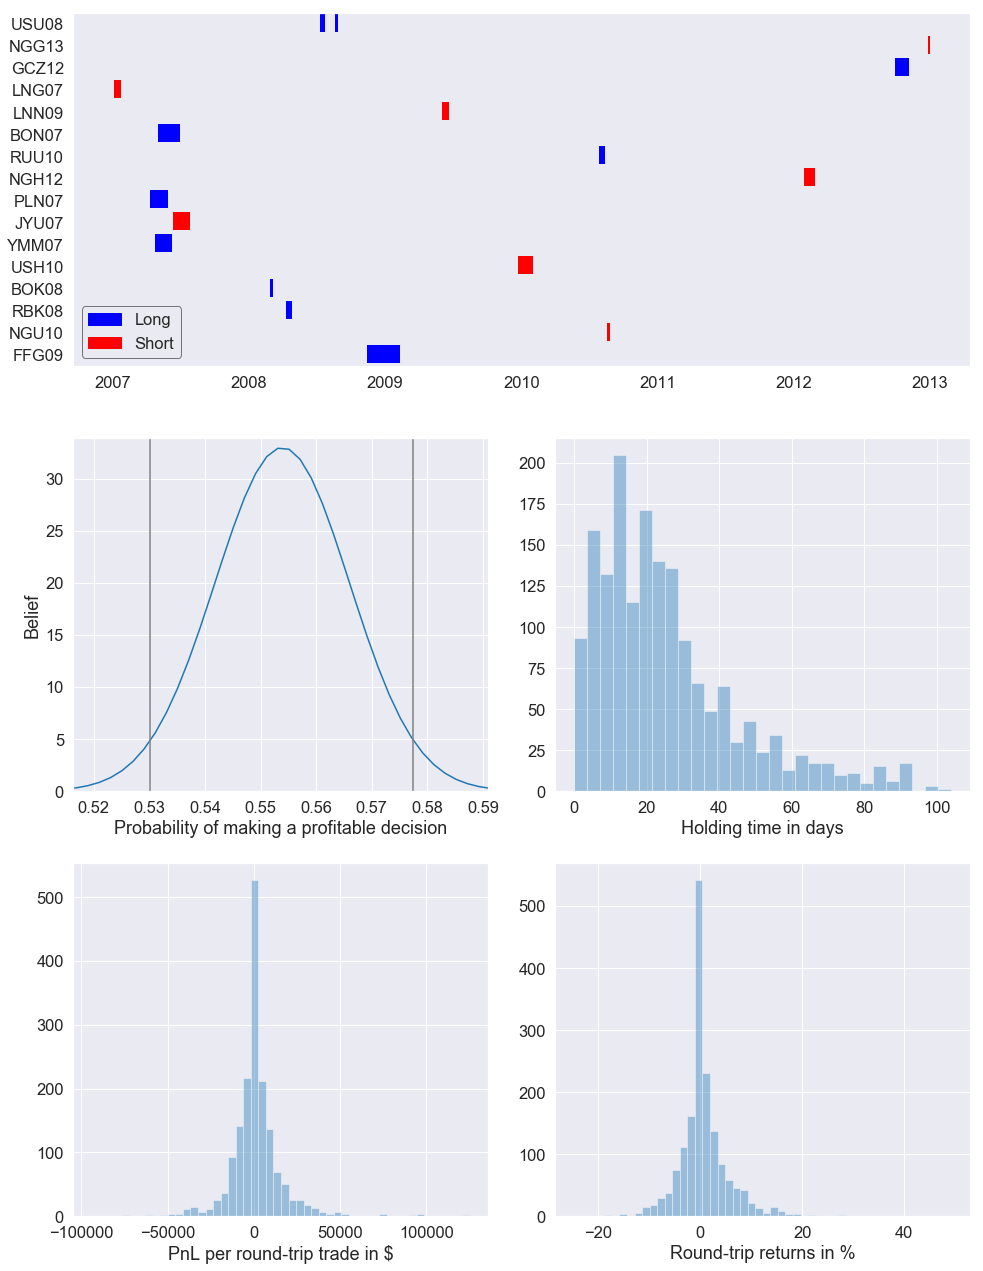

In [7]:
pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions_mod,
                          live_start_date=out_of_sample, round_trips=True, benchmark_rets=benchmark,
                          sector_mappings=sector_map, hide_positions=True)

# PnL by root symbol in dollars and % of total PnL

In [8]:
from pyfolio.round_trips import extract_round_trips, add_closing_transactions, apply_sector_mappings_to_round_trips
trips = add_closing_transactions(positions, transactions_mod)
trips['value'] = -trips.amount * trips.price
trips['root_symbol'] = trips['symbol'].apply(lambda x: x.root_symbol)
trips = trips.groupby(by='root_symbol').sum().sort_values(by='value', ascending=False)
trips['percent'] = round(trips.value.divide(abs(trips.value.sum())) * 100, 1)
del trips['amount']
del trips['price']
trips

,value,percent
root_symbol,,
FF,523583.55,22.9
NG,314560.00,13.8
DA,237960.00,10.4
TY,209239.00,9.2
FV,192772.00,8.4
US,171421.00,7.5
SF,167000.00,7.3
TU,165906.00,7.3
PA,112645.00,4.9


In [9]:
#sanity check
total_pnl = trips.value.sum()
total_pnl

2282037.6499998635

# PnL by sectors

In [10]:
t = add_closing_transactions(positions, transactions_mod)
rt = extract_round_trips(t)

In [11]:
trips_by_sector = apply_sector_mappings_to_round_trips(rt, sector_map)
sectors = {}
for sector, data in trips_by_sector.groupby('symbol'):
    #choose relevant columns and sum daily pnl
    data = data[['close_dt', 'pnl']].groupby('close_dt').sum()
    data['pnl'] = data['pnl'].cumsum()
    sectors[sector] = data

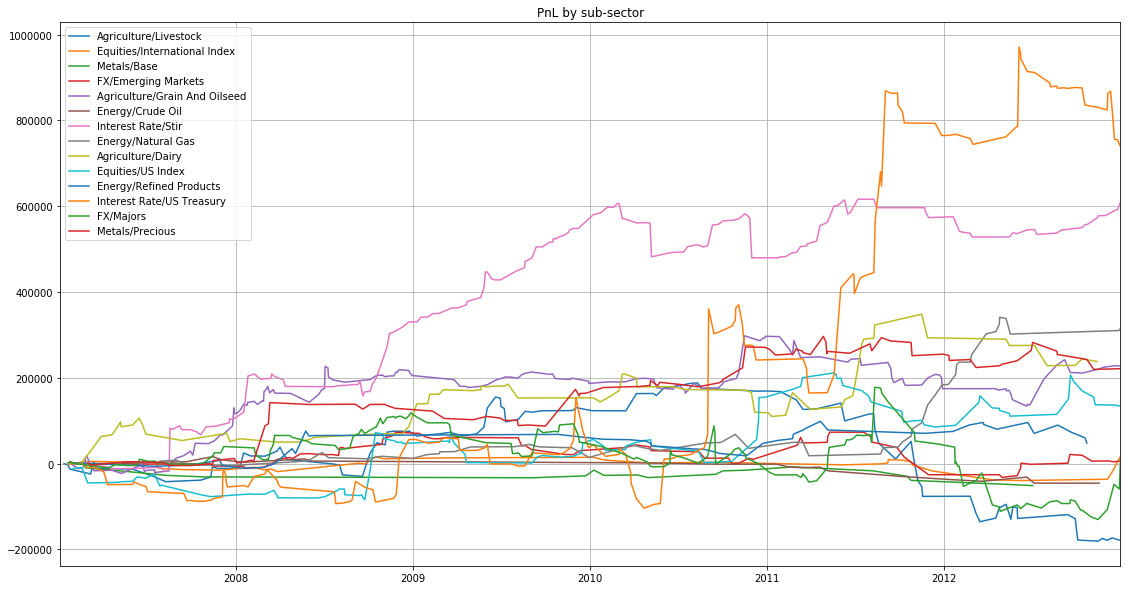

In [12]:
fig = plt.figure(figsize=(19,10))
ax = fig.add_subplot(111)
for sector, df in sectors.items():
    ax.plot(df, label=sector)
ax.grid()
ax.legend()
plt.title('PnL by sub-sector')
plt.xlim([results.index[0], results.index[-1]])
plt.show();

In [13]:
# sanity check
total_pnl1 = 0
for sector, df in sectors.items():
    total_pnl1 += df.pnl[-1]
total_pnl1

2282037.649999954

In [14]:
# generate sector dictionary for every symbol - use main sectors only (no sub-sectors)
#pos = list(positions.columns)
#pos.remove('cash')
pos = list(transactions_mod['symbol'])
sectors = pd.read_csv('../bundles/meta.csv', usecols=['root_symbol', 'sector',], index_col=['root_symbol'])
sectors.index = sectors.index.map(lambda x: x if len(x) > 1 else '_' + x)
sectors = sectors.T.to_dict(orient='records')[0]
sector_map_main_only = {p: sectors[p.root_symbol] for p in pos}

In [15]:
trips_by_sector = apply_sector_mappings_to_round_trips(rt, sector_map_main_only)
sectors = {}
for sector, data in trips_by_sector.groupby('symbol'):
    #choose relevant columns and sum daily pnl
    data = data[['close_dt', 'pnl']].groupby('close_dt').sum()
    data['pnl'] = data['pnl'].cumsum()
    sectors[sector] = data

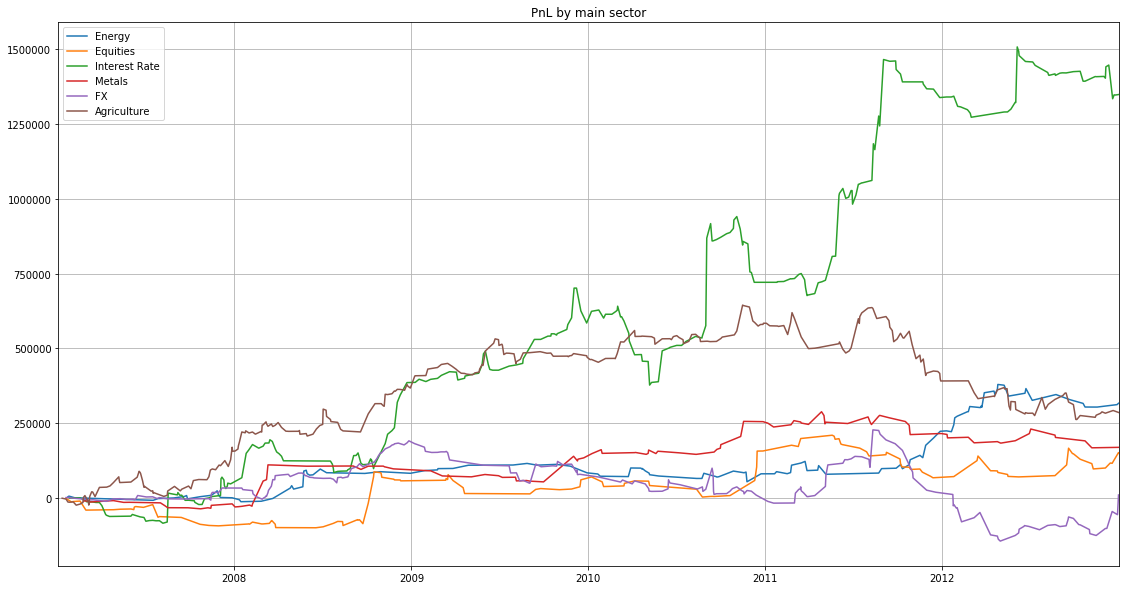

In [16]:
fig = plt.figure(figsize=(19,10))
ax = fig.add_subplot(111)
for sector, df in sectors.items():
    ax.plot(df, label=sector)
ax.grid()
ax.legend()
plt.title('PnL by main sector')
plt.xlim([results.index[0], results.index[-1]])
plt.show()

# Visualization of trades for given root symbol

In [17]:
root = 'ES'

In [18]:
from utils import future, continuous_future, history


def his(root, field='price'):
    return history(
                   assets=[continuous_future(root,
                                     offset=0,
                                     adjustment=None,
                                     roll_style='volume')],
                    end_dt=results.index[-1],
                    bar_count=len(results),
                    frequency='1d',
                    field=field,
                    data_frequency='daily'
                    )

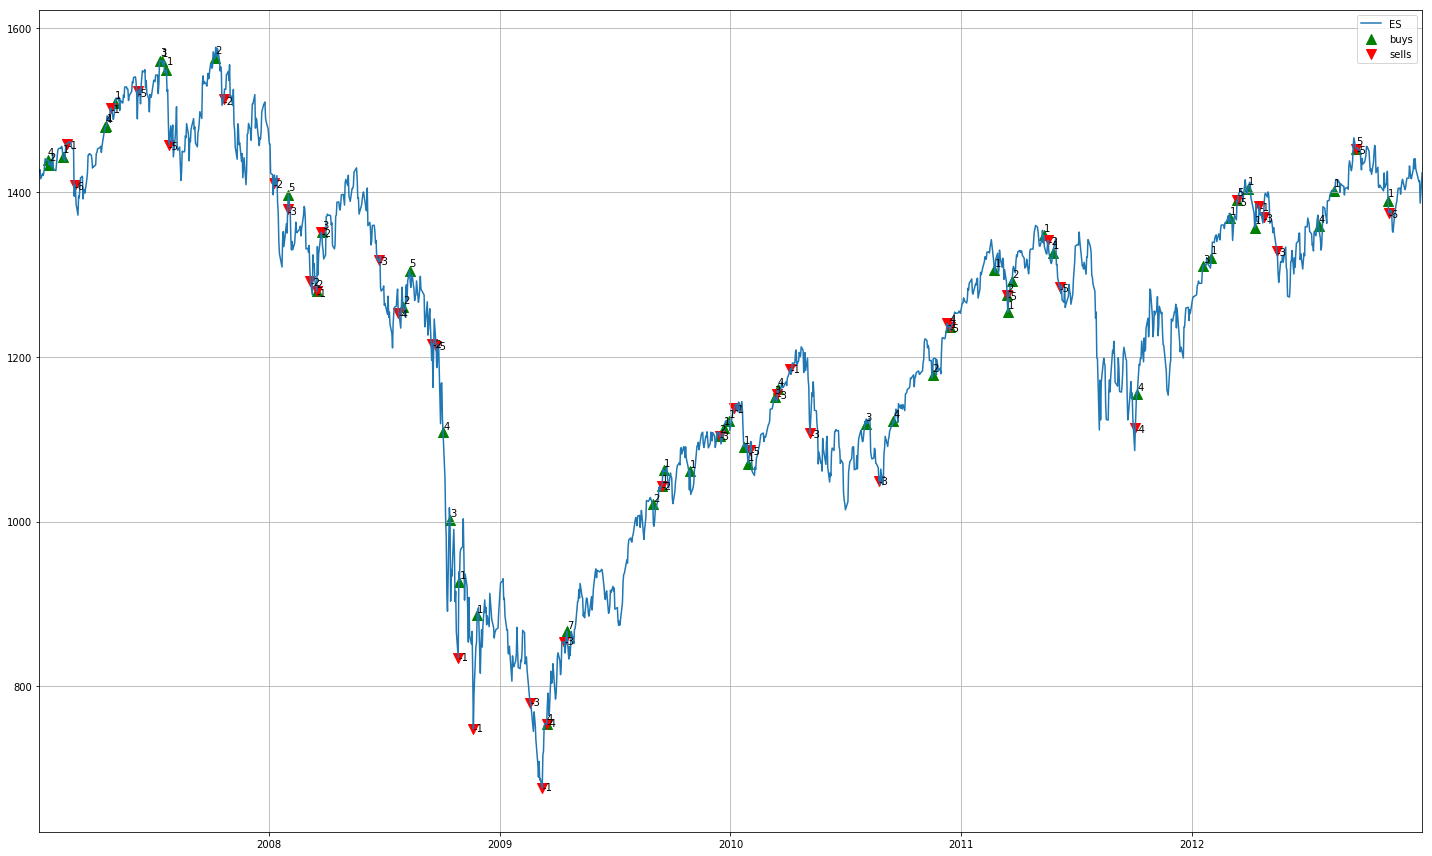

In [19]:
h = his(root)
h.columns=[root]

transactions['root_symbol'] = transactions['symbol'].apply(lambda x: x.root_symbol)
selected = transactions[transactions['root_symbol'] == root]
selected.index = selected.index.normalize()
buys = selected[selected['amount'] > 0]
sells = selected[selected['amount'] < 0]

plt.figure(figsize=(20,12))
plt.plot(h, label=root)
plt.scatter(buys.index, h.loc[buys.index], label='buys', color='green', s=100, marker="^")
plt.scatter(sells.index, h.loc[sells.index], label='sells', color='red', s=100, marker="v")
for i, txt in enumerate(buys['amount'].values):
    plt.annotate(txt, (buys.index[i], h.loc[buys.index[i]][root]*1.004))
for i, txt in enumerate(sells['amount'].values):
    plt.annotate(txt, (sells.index[i], h.loc[sells.index[i]][root]*.996))
plt.xlim(h.index.min(), h.index.max())
plt.legend(loc='best')
plt.grid()
#plt.rcParams['font.size'] = 15
plt.tight_layout()
plt.show();

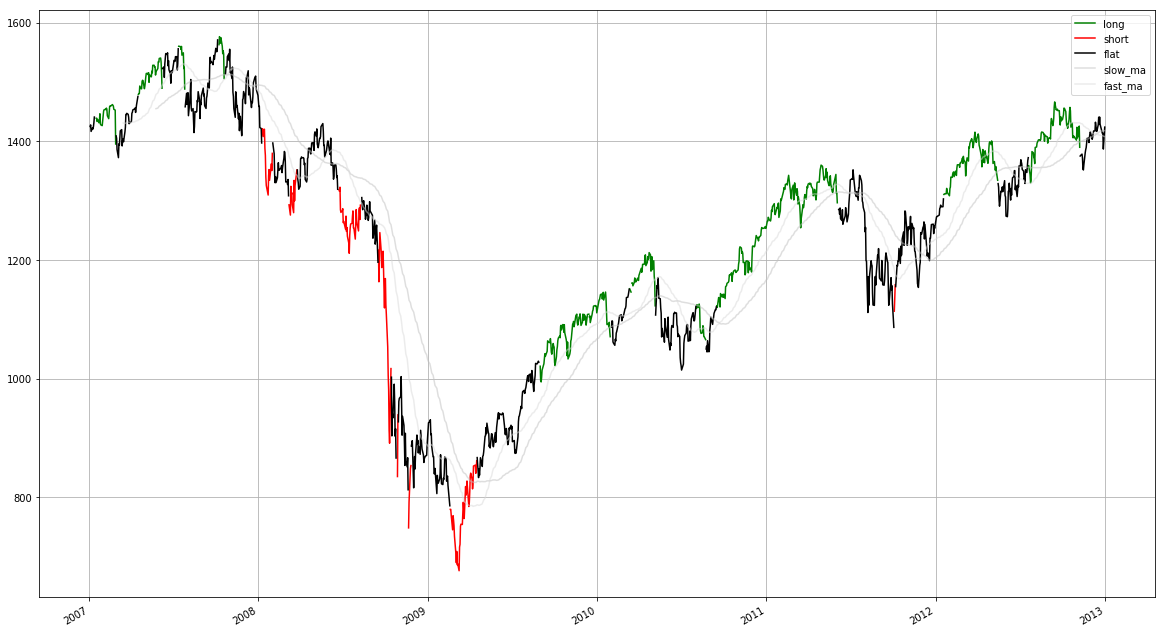

In [20]:
chart = h.copy()
chart = chart.join(selected.amount)
chart.amount = chart.amount.fillna(0)
chart.ix[0, 'amount']=0
chart['cumulative'] = chart['amount'].cumsum(skipna=False)

chart['long'] = chart['cumulative'] > 0
chart['short'] = chart['cumulative'] < 0
chart['flat'] = chart['cumulative'] == 0
chart['long'] = chart['long'] * chart[root]
chart['short'] = chart['short'] * chart[root]
chart['flat'] = chart['flat'] * chart[root]
chart['slow_ma'] = chart[root].rolling(100).mean()
chart['fast_ma'] = chart[root].rolling(50).mean()
chart = chart[['long', 'short', 'flat', 'slow_ma', 'fast_ma']].applymap(lambda x: x if x != 0 else np.nan)

chart['long'].plot(figsize=(20,12), legend=True, color='green')
chart['short'].plot(legend=True, color='red')
chart['flat'].plot(legend=True, color='black')
chart['slow_ma'].plot(legend=True, color='.75', alpha=0.5)
chart['fast_ma'].plot(legend=True, color='.85', alpha=0.5)
plt.grid();

In [21]:
import plotly
import plotly.offline as py
import plotly.graph_objs as go

plotly.offline.init_notebook_mode(connected=True)

full_h = his(root)
full_h.columns = ['close']
for field in ['open', 'high', 'low',]:
    full_h[field] = his(root, field)

In [22]:
exclude_rolls = False
if exclude_rolls:
    intersection = buys.index.intersection(sells.index)
    buys = buys.drop(intersection)
    sells = sells.drop(intersection)

In [23]:
trace1 = go.Candlestick(x=full_h.index, 
                        open=full_h.open,
                        high=full_h.high,
                        low=full_h.low,
                        close=full_h.close, 
                        name=root, 
                        hoverinfo='none',
                       )


params = {
    'mode': 'markers',
    'hoverinfo': 'text',
}
trace2 = go.Scatter(
    x=buys.index,
    y=buys['price'],
    name='Buys',
    text=list(buys['amount']),
    textposition='middle left',
    marker=dict(size=8,
                color='rgba(0, 0, 128, .9)'),
    **params,
)
trace3 = go.Scatter(
    x=sells.index,
    y=sells['price'],
    name='Sells',
    text=list(sells['amount']),
    textposition='middle right',
    marker=dict(size=8,
                color='rgba(255, 255, 0, .9)'),
    **params
)

layout = go.Layout(
    xaxis = dict(
        rangeslider = dict(
            visible = False
        )
    )
)
data = [trace1, trace2, trace3]
fig = go.Figure(data=data,layout=layout)

py.iplot(fig, filename='candlestick_chart')

In [24]:
transactions[transactions['root_symbol']==root]

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
2007-01-16 21:00:00+00:00,4,None,2007-01-16 21:00:00+00:00,e0eefc4febe641c2b776b2cf1ca315f3,1441.00,Future(7321 [ESH07]),Future(7321 [ESH07]),-288200.0,ES
2007-01-18 21:00:00+00:00,2,None,2007-01-18 21:00:00+00:00,8a5f3167454e4cc19e80276c0982e9d9,1438.50,Future(7321 [ESH07]),Future(7321 [ESH07]),-143850.0,ES
2007-02-09 21:00:00+00:00,1,None,2007-02-09 21:00:00+00:00,a33fb68a59194336986511bd01c5d066,1453.75,Future(7321 [ESH07]),Future(7321 [ESH07]),-72687.5,ES
2007-02-16 21:00:00+00:00,-1,None,2007-02-16 21:00:00+00:00,3168731c0508426a8bf07ff6b5d7f040,1459.50,Future(7321 [ESH07]),Future(7321 [ESH07]),72975.0,ES
2007-02-28 21:00:00+00:00,-6,None,2007-02-28 21:00:00+00:00,b54001a2bbd84af5b7f0b6072a0eca87,1395.75,Future(7321 [ESH07]),Future(7321 [ESH07]),418725.0,ES
2007-04-17 20:00:00+00:00,4,None,2007-04-17 20:00:00+00:00,afd186dd08ea4356838b435affeffc5c,1474.75,Future(7395 [ESM07]),Future(7395 [ESM07]),-294950.0,ES
2007-04-19 20:00:00+00:00,1,None,2007-04-19 20:00:00+00:00,6f9ef2ab37bd4a21a65dc5d7ab2cff43,1480.50,Future(7395 [ESM07]),Future(7395 [ESM07]),-74025.0,ES
2007-04-26 20:00:00+00:00,-1,None,2007-04-26 20:00:00+00:00,3bb30c8876f946db88e07bca58d51bad,1500.75,Future(7395 [ESM07]),Future(7395 [ESM07]),75037.5,ES
2007-05-03 20:00:00+00:00,1,None,2007-05-03 20:00:00+00:00,9a2b842c0fd941e690c77bdf2b39208f,1500.75,Future(7395 [ESM07]),Future(7395 [ESM07]),-75037.5,ES
2007-06-08 20:00:00+00:00,-5,None,2007-06-08 20:00:00+00:00,120454f19e4947f9b491ea53ec30e153,1490.25,Future(7395 [ESM07]),Future(7395 [ESM07]),372562.5,ES


In [25]:
t= transactions[transactions['root_symbol']==root]

In [26]:
t.loc['2015':'2018']

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars,root_symbol
